## PROYECTO FINAL INTEGRADOR - ANÁLISIS Y RECOMENDACIÓN DE VINOS
---------------------

<img src="https://raw.githubusercontent.com/RodrigoVelasco19/Imagenes/main/Vino2.jpg" width="70%">

#### *Objetivo: Aplicar técnicas de exploración y transformación de datos (EDA y ETL), Machine Learning y Procesamiento de Lenguaje Natural (NLP) para extraer información valiosa sobre vinos y construir un sistema de recomendación basado en reseñas.*
---

### Importación de librerias
---

In [56]:
from google.colab import drive
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

Se busca analizar la distribución de calidad/precio en los distintos vinos. Se analizará que regiones y variedades de uva presentar valores más elevados de este indicador.
Finalmente se aplicarán técnicas de regresión para predecir el precio de un vino según sus características.

Se crea un nuevo dataframe ('df_clean_cp') para esta sección. A partir del dataframe df 'df_clean' se agrega una nueva columna con la resultante del cociente puntuacion/precio.

In [57]:
# Se descarga el dataframe df_clean proveniente del proceso de ETL y EDA

drive.mount('/content/drive')
# Ruta del archivo en Google Drive
file_path = "/content/drive/My Drive/Proyecto-Final-Integrador-Analisis-y-Recomendaciones-de-Vinos/dataframes/df_clean.pkl"

# Cargar el DataFrame
df_clean = pd.read_pickle(file_path)

# Verificar que se cargó correctamente
df_clean.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,pais,descripcion,puntuacion,precio,provincia,variedad,bodega
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Pinot Noir,Sweet Cheeks
5,Spain,Blackberry and raspberry aromas show a typical...,87,15.0,Northern Spain,Tempranillo-Merlot,Tandem


In [58]:
# Crear una copia de df_clean para trabajar con ella
df_clean_cp = df_clean.copy()

# Agregar la columna "calidad-precio" como el cociente entre "puntuacion" y "precio"
df_clean_cp['calidad-precio'] = df_clean_cp['puntuacion'] / df_clean_cp['precio']

# Verificar las primeras filas del nuevo DataFrame
df_clean_cp.head()

,pais,descripcion,puntuacion,precio,provincia,variedad,bodega,calidad-precio
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,Portuguese Red,Quinta dos Avidagos,5.800000
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Pinot Gris,Rainstorm,6.214286
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,Riesling,St. Julian,6.692308
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Pinot Noir,Sweet Cheeks,1.338462
5,Spain,Blackberry and raspberry aromas show a typical...,87,15.0,Northern Spain,Tempranillo-Merlot,Tandem,5.800000


#### 3.1. Análisis de distribución calidad/precio en los vinos
----

Analizamos la distribución del indicador calidad-precio para los distintos vinos.

<ipython-input-59-beacc43a3356>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_clean_cp['calidad-precio'], shade=True, color='blue')


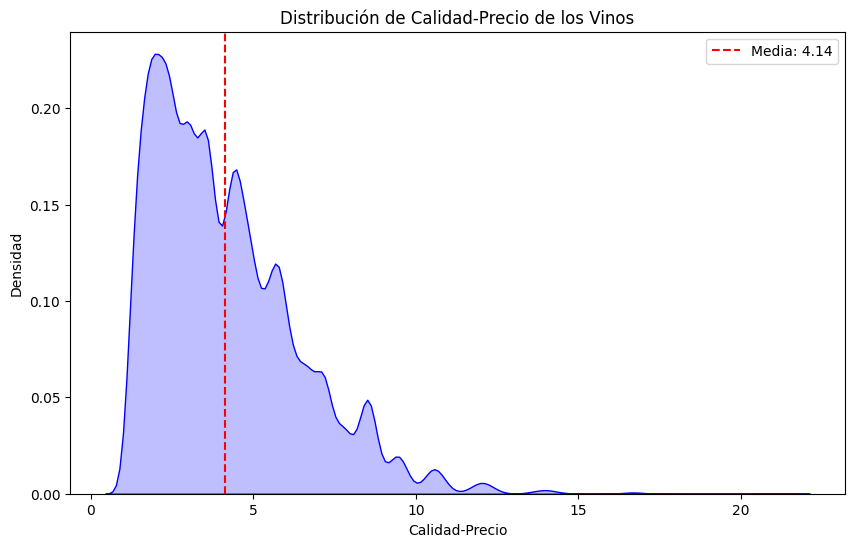

In [59]:
# Calcular la media de calidad-precio
mean_quality_price = df_clean_cp['calidad-precio'].mean()

# Ajustar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Graficar el gráfico de densidad de la columna "calidad-precio"
sns.kdeplot(df_clean_cp['calidad-precio'], shade=True, color='blue')

# Agregar la línea de la media
plt.axvline(mean_quality_price, color='red', linestyle='--', label=f'Media: {mean_quality_price:.2f}')

# Etiquetas y título
plt.xlabel('Calidad-Precio')
plt.ylabel('Densidad')
plt.title('Distribución de Calidad-Precio de los Vinos')

# Mostrar la leyenda
plt.legend()

# Mostrar la gráfica
plt.show()

#### 3.2. Distribución calidad/precio por pais y por variedad de uva
----

Se analiza la distribución del indicador calidad-precio por pais.

<ipython-input-60-fdf1046b4fb5>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_quality_price.index, y=country_quality_price.values, palette='viridis')


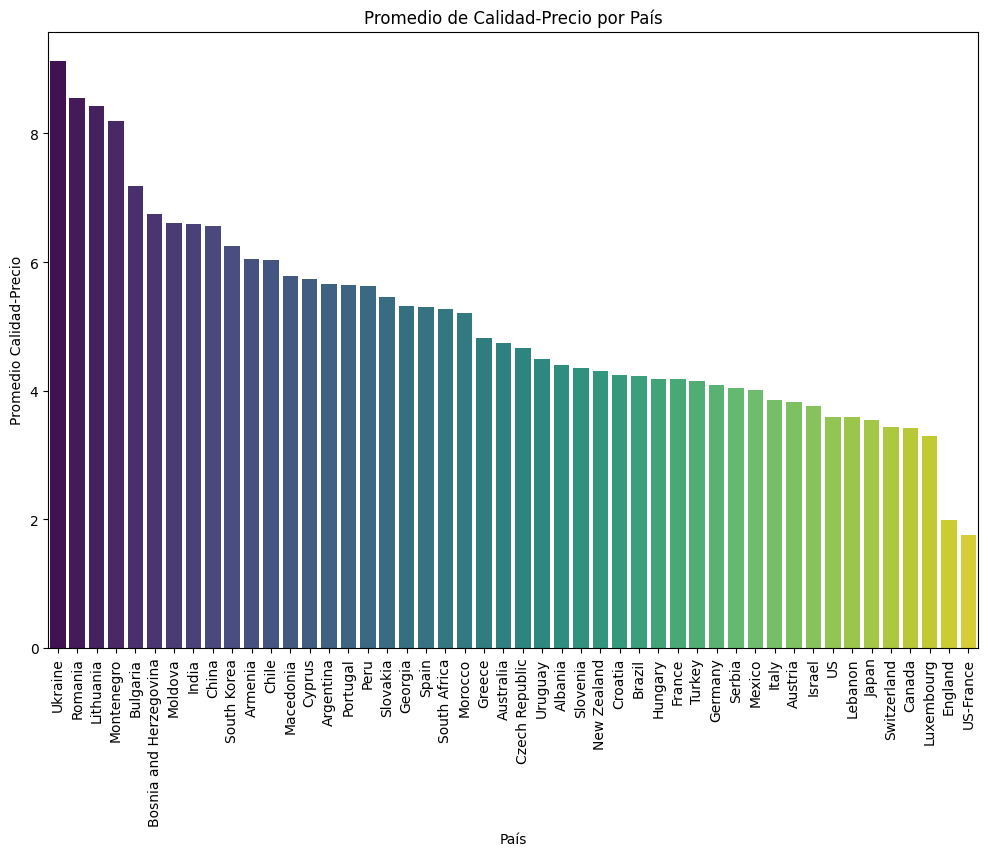

In [60]:
# Calcular el promedio de calidad-precio por país
country_quality_price = df_clean_cp.groupby('pais')['calidad-precio'].mean().sort_values(ascending=False)

# Ajustar el tamaño del gráfico
plt.figure(figsize=(12, 8))

# Graficar el promedio de calidad-precio por país
sns.barplot(x=country_quality_price.index, y=country_quality_price.values, palette='viridis')

# Etiquetas y título
plt.xlabel('País')
plt.ylabel('Promedio Calidad-Precio')
plt.title('Promedio de Calidad-Precio por País')

# Rotar las etiquetas del eje X para que se vean bien
plt.xticks(rotation=90)

# Mostrar la gráfica
plt.show()

Se analiza la distribución del indicador calidad-precio por variedad de uva. Solo se tienen en cuenta aquellas variedades que representa más del 1.5% del total.

<ipython-input-61-40522c851792>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=variety_quality_price.index, y=variety_quality_price.values, palette='viridis')


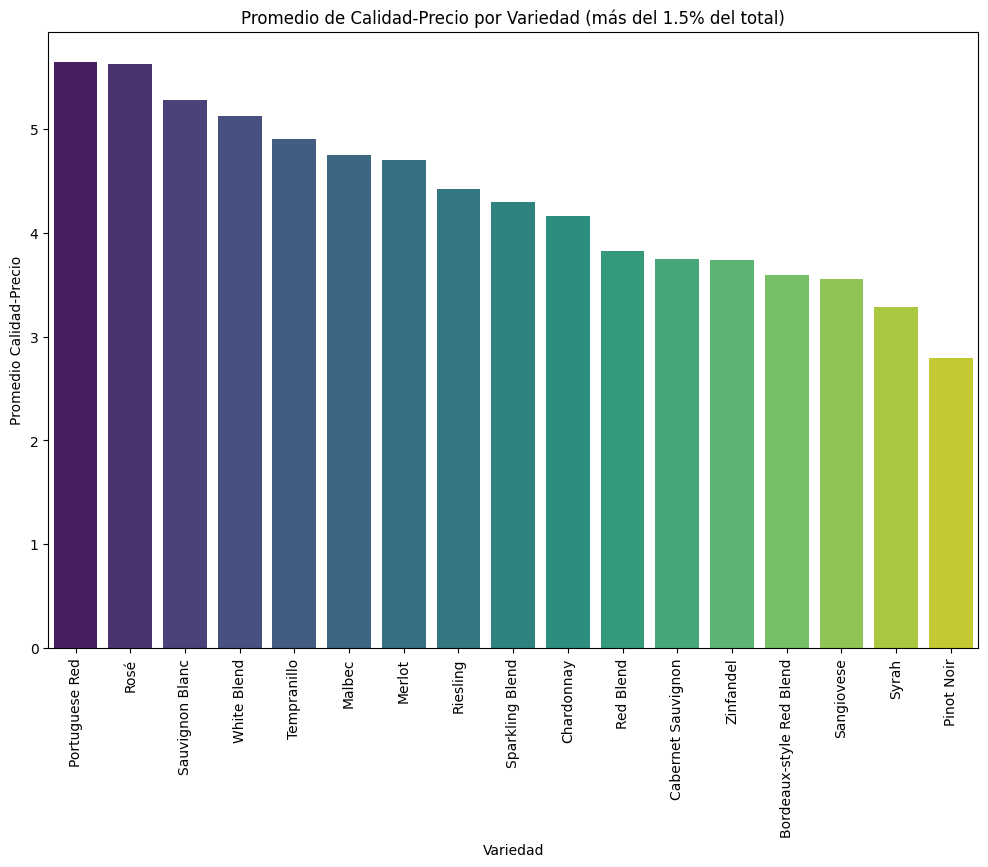

In [61]:
# Excluir el grupo "Otras (<1%)"
df_filtered = df_clean_cp[df_clean_cp['variedad'] != 'Otras (<1%)']

# Calcular la frecuencia de cada variedad y el porcentaje correspondiente
variety_counts = df_filtered['variedad'].value_counts()
variety_percentage = variety_counts / variety_counts.sum() * 100

# Filtrar las variedades que representan más del 1.5% del total
selected_varieties = variety_percentage[variety_percentage > 1.5].index

# Filtrar el DataFrame para solo considerar esas variedades
df_filtered = df_filtered[df_filtered['variedad'].isin(selected_varieties)]

# Calcular el promedio de calidad-precio por variedad
variety_quality_price = df_filtered.groupby('variedad')['calidad-precio'].mean().sort_values(ascending=False)

# Ajustar el tamaño del gráfico
plt.figure(figsize=(12, 8))

# Graficar el promedio de calidad-precio por variedad
sns.barplot(x=variety_quality_price.index, y=variety_quality_price.values, palette='viridis')

# Etiquetas y título
plt.xlabel('Variedad')
plt.ylabel('Promedio Calidad-Precio')
plt.title('Promedio de Calidad-Precio por Variedad (más del 1.5% del total)')

# Rotar las etiquetas del eje X para que se vean bien
plt.xticks(rotation=90)

# Mostrar la gráfica
plt.show()

#### 3.3. Modelo para predecir el precio del vino
----

Debido a que el objetivo es predecir un valor continuo, como el precio del vino, resulta adecuado utilizar un modelo de Regresión Lineal.

Se genera inicialmente un modelo de Regresión Lineal para predecir el precio del vino en base a sus características: puntuación, país, provincia, variedad.

Luego se genera un modelo Random Forest y se comparan los resultados.



a) Usamos las columnas 'puntuacion', 'pais', 'provincia', y 'variedad' como características para predecir el precio.

In [62]:
# Seleccionar las características (columnas) y la variable objetivo
X = df_clean_cp[['puntuacion', 'pais', 'provincia', 'variedad']]  # Seleccionar las columnas de características
y = df_clean_cp['precio']  # Variable objetivo: precio

b) Usamos OneHotEncoding para convertir las columnas categóricas en variables numéricas.

In [63]:
# Preprocesar las características categóricas usando OneHotEncoding
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['pais', 'provincia', 'variedad'])  # Ignorar categorías desconocidas
    ],
    remainder='passthrough'  # Mantener las demás columnas tal como están (puntuacion)
)


c) Creamos el modelo de Regresión Lineal, dividimos los datos en entrenamiento (80%) y prueba(20%). Se entrena el modelo con los datos de entrenamiento para luego realizar las predicciones con los datos de prueba.

In [64]:
# Crear un pipeline con el preprocesador y el modelo de regresión lineal
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())  # Usamos regresión lineal
])

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Hacer predicciones sobre el conjunto de prueba
y_pred = pipeline.predict(X_test)

d) Calculamos el Mean Squared Error (MSE) y el R² para evaluar el rendimiento del modelo.

In [65]:
# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mostrar los resultados
print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error (MSE): 136.88652222508168
R^2 Score: 0.46826537930263856


MSE es una métrica que mide el error cuadrático promedio entre los valores reales y las predicciones del modelo.

El valor de 142.69 sugiere que el modelo tiene un error moderado.

En términos prácticos, el MSE indica cuán lejos están las predicciones del modelo de los valores reales, pero al ser una métrica cuadrática, da más peso a los errores grandes.

R² (R-squared) indica el porcentaje de la variabilidad en el precio que está siendo explicada por el modelo. Un R² de 0.4457 significa que el modelo está explicando aproximadamente 44.57% de la variabilidad en los precios de los vinos.

-----------------


Como alternativa al modelo de Regresión Lineal se genera un modelo Random Forest.

In [66]:
# Seleccionar las características (columnas) y la variable objetivo
X = df_clean_cp[['puntuacion', 'pais', 'provincia', 'variedad']]  # Seleccionar las columnas de características
y = df_clean_cp['precio']  # Variable objetivo: precio

# Preprocesar las características categóricas usando OneHotEncoding
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['pais', 'provincia', 'variedad'])  # Ignorar categorías desconocidas
    ],
    remainder='passthrough'  # Mantener las demás columnas tal como están (puntuacion)
)

# Crear un pipeline con el preprocesador y el modelo de Random Forest
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=40, random_state=42))  # Usamos Random Forest
])

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Hacer predicciones sobre el conjunto de prueba
y_pred = pipeline.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mostrar los resultados
print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error (MSE): 127.56084948243489
R^2 Score: 0.5044908818426572


Se observa que con el modelo Random Forest la capacidad de predecir del modelo mejora un poco en comparación con el modelo de Regresión Lineal.

-------------------------------